In [ ]:
#install required libraries
!pip install pystac-client planetary-computer odc-stac matplotlib


In [ ]:
import pystac_client
import planetary_computer
import odc.stac
import matplotlib.pyplot as plt
from pystac.extensions.eo import EOExtension as eo

catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace
)

In [ ]:
study_area = [91.7832, 22.2454, 91.9328, 22.4606]
time = "2023-01-01/2023-12-31"

image_collection = catalog.search(
    collections=["sentinel-2-l2a"],
    bbox=study_area,
    datetime=time,
    query={"eo:cloud_cover": {"lt": 5}},
    sortby=["eo:cloud_cover"]
)

total_images = image_collection.item_collection()
print(f"total {len(total_images)} images found with this time period for your area")

In [18]:
image = total_images[0]
bands_of_interest = [ "red", "green", "blue", "nir"]
final_image = odc.stac.stac_load(
    [image], bands=bands_of_interest, bbox=study_area
).isel(time=0)
final_image

<xarray.Dataset> Size: 60MB
Dimensions:      (y: 2395, x: 1559)
Coordinates:
  * y            (y) float64 19kB 2.484e+06 2.484e+06 ... 2.46e+06 2.46e+06
  * x            (x) float64 12kB 3.746e+05 3.746e+05 ... 3.902e+05 3.902e+05
    spatial_ref  int32 4B 32646
    time         datetime64[ns] 8B 2023-12-29T04:21:59.024000
Data variables:
    red          (y, x) float32 15MB 1.544e+03 1.542e+03 ... 1.363e+03 1.503e+03
    green        (y, x) float32 15MB 1.694e+03 1.708e+03 ... 1.419e+03 1.531e+03
    blue         (y, x) float32 15MB 1.476e+03 1.477e+03 ... 1.302e+03 1.402e+03
    nir          (y, x) float32 15MB 3.77e+03 3.822e+03 ... 2.692e+03 3.282e+03

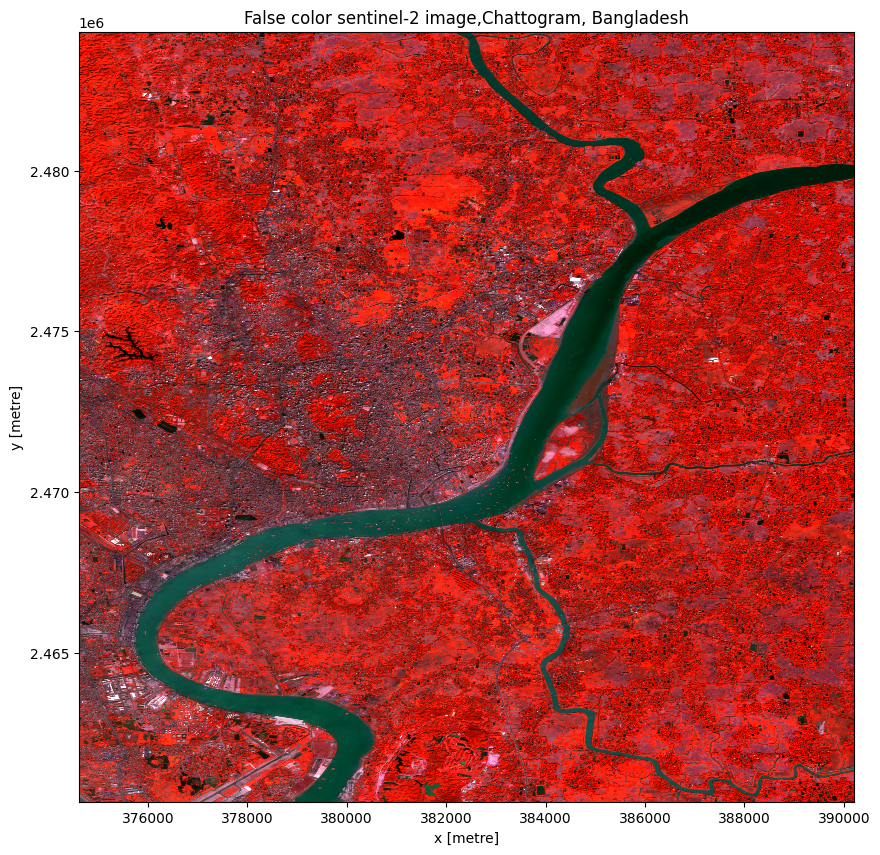

In [19]:
false_color_img = final_image[["nir", "green", "red"]].to_array()

fig, ax = plt.subplots(figsize=(10, 10))
false_color_img.plot.imshow(robust = True)
ax.set_title("False color sentinel-2 image,Chattogram, Bangladesh");